In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [50]:
df = pd.read_csv('RELIANCE.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0
1,2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0
2,2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0
3,2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0
4,2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0


In [51]:
df.shape

(2634, 7)

In [52]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2634.000000,2634.000000,2634.000000,2634.000000,2634.000000,2.634000e+03
mean,593.500057,600.787471,586.714278,593.416973,556.435824,8.622828e+06
std,264.054719,266.530348,261.098518,263.770466,278.365257,5.485415e+06
min,0.000000,286.250000,266.250000,269.388000,222.757553,0.000000e+00
25%,432.568741,437.500000,426.962509,432.125000,391.739197,5.316242e+06
50%,497.174988,502.500000,491.550003,496.649994,445.431839,7.126298e+06
75%,556.181259,565.875000,546.812500,554.640991,524.052490,1.009307e+07
max,1407.949951,1417.500000,1402.650024,1408.849976,1401.091064,8.624427e+07


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2634 entries, 0 to 2633
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2634 non-null   object 
 1   Open       2634 non-null   float64
 2   High       2634 non-null   float64
 3   Low        2634 non-null   float64
 4   Close      2634 non-null   float64
 5   Adj Close  2634 non-null   float64
 6   Volume     2634 non-null   float64
dtypes: float64(6), object(1)
memory usage: 144.2+ KB


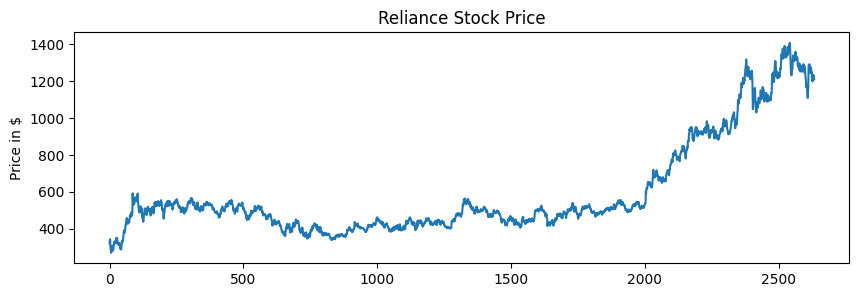

In [54]:
plt.figure(figsize=(10,3))
plt.plot(df['Close'])
plt.title('Reliance Stock Price')
plt.ylabel('Price in $')
plt.show()

In [55]:
df.index = pd.to_datetime(df['Date'])
df.drop('Date',axis=1,inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0


In [56]:
df['open-close']=df['Open']-df['Close']
df['high-low']=df['High']-df['Low']

x=df[['open-close','high-low']]
x.head()

y=np.where(df['Close'].shift(-1)>df['Close'],1,0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,open-close,high-low
Date,,,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0,-6.675018,11.975006
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0,-16.712006,20.475006
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0,-2.725006,14.687988
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0,42.062012,52.750000
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0,14.187988,29.087006


In [57]:
split_percentage =0.8
split = int(split_percentage*len(df))

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]


In [58]:
cls = SVC().fit(x_train,y_train)

In [59]:
train_accuracy = accuracy_score(y_train,cls.predict(x_train))
test_accuracy = accuracy_score(y_test,cls.predict(x_test))
print('Training Accuracy: ',train_accuracy)
print('Testing Accuracy: ',test_accuracy)


Training Accuracy:  0.5358329378262933
Testing Accuracy:  0.47248576850094876


In [60]:
# linear kernel
cls_linear = SVC(kernel='linear').fit(x_train,y_train)
linear_accuracy = accuracy_score(y_test,cls_linear.predict(x_test))
print('Accuracy with linear kernel: ',linear_accuracy)

# Polynomial kernel
cls_poly = SVC(kernel='poly', degree=3).fit(x_train,y_train)
poly_accuracy = accuracy_score(y_test,cls_poly.predict(x_test))
print('Accuracy with polynomial kernel: ',poly_accuracy)

# rbf kernel
cls_rbf = SVC(kernel='rbf').fit(x_train,y_train)
rbf_accuracy = accuracy_score(y_test,cls_rbf.predict(x_test))
print('Accuracy with rbf kernel: ',rbf_accuracy)

#sigmoid kernel
cls_sigmoid = SVC(kernel='sigmoid').fit(x_train,y_train)
sigmoid_accuracy = accuracy_score(y_test,cls_sigmoid.predict(x_test))
print('Accuracy with sigmoid kernel: ',sigmoid_accuracy)




Accuracy with linear kernel:  0.49146110056925996
Accuracy with polynomial kernel:  0.48956356736242884
Accuracy with rbf kernel:  0.47248576850094876
Accuracy with sigmoid kernel:  0.5047438330170778


In [61]:
df['Predicted_signal']=cls.predict(x)
df['Return']=df.Close.pct_change()
df['Strategy_Return'] = df.Return * df.Predicted_signal.shift(1)
df['Cum_Ret']=df['Return'].cumsum()

In [62]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()

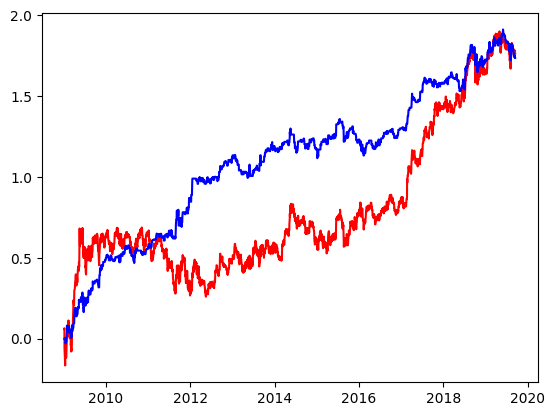

In [63]:
%matplotlib inline
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')